In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [55]:
%pwd

'/home/dyllanjr/Metis_Project1'

In [56]:
demos = pd.read_csv('quickfacts.csv', index_col="Fact")
demos.head(100)

,Fact Note,"Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York","Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York","Richmond County (Staten Island Borough), New York","Value Note for Richmond County (Staten Island Borough), New York","New York County (Manhattan Borough), New York","Value Note for New York County (Manhattan Borough), New York","Bronx County (Bronx Borough), New York","Value Note for Bronx County (Bronx Borough), New York","New York city, New York","Value Note for New York city, New York"
Fact,,,,,,,,,,,,,
"Population estimates, July 1, 2019, (V2019)",NaN,"2,559,903",NaN,"2,253,858",NaN,"476,143",NaN,"1,628,706",NaN,"1,418,207",NaN,"8,336,817",NaN
"Population estimates base, April 1, 2010, (V2019)",NaN,"2,504,721",NaN,"2,230,619",NaN,"468,730",NaN,"1,586,381",NaN,"1,384,580",NaN,"8,175,031",NaN
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",NaN,2.2%,NaN,1.0%,NaN,1.6%,NaN,2.7%,NaN,2.4%,NaN,2.0%,NaN
"Population, Census, April 1, 2010",NaN,"2,504,700",NaN,"2,230,722",NaN,"468,730",NaN,"1,585,873",NaN,"1,385,108",NaN,"8,175,133",NaN
"Persons under 5 years, percent",NaN,7.1%,NaN,6.1%,NaN,5.7%,NaN,4.7%,NaN,7.1%,NaN,6.5%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
N,Data for this geographic area cannot be displa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#get rid of ugly columns
demos = demos.drop(columns = [column for column in demos.columns[::2]])

In [58]:
#renamed columns
demos.columns = ['Brooklyn', 'Queens', 'Staten_Island', 'Manhattan', 'Bronx', 'NYC_Total']
demos.columns

Index(['Brooklyn', 'Queens', 'Staten_Island', 'Manhattan', 'Bronx',
       'NYC_Total'],
      dtype='object')

In [59]:
income = demos.loc['Median household income (in 2018 dollars), 2014-2018']
income = income.str.replace('$', '')
income = income.str.replace(',', '')
income = income.astype(int)
income = income.reset_index()
income.columns = ['Bor', 'Median_Income']
income

,Bor,Median_Income
0,Brooklyn,56015
1,Queens,64987
2,Staten_Island,79267
3,Manhattan,82459
4,Bronx,38085
5,NYC_Total,60762


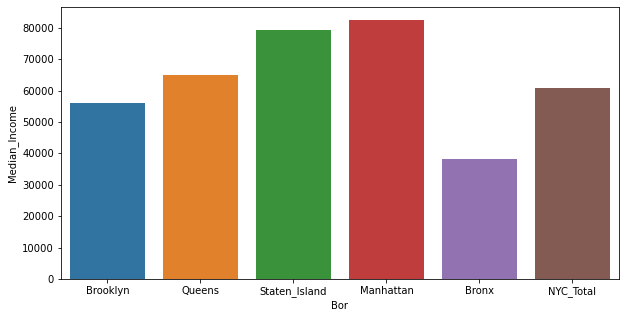

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='Bor', y='Median_Income', data=income);


In [65]:
#women owned firms
wof = demos.loc['Women-owned firms, 2012']
wof = wof.str.replace(',', '')
wof = wof.astype(int)
wof = wof.reset_index()
wof.columns = ['Bor', 'Women_Owned_Firms']

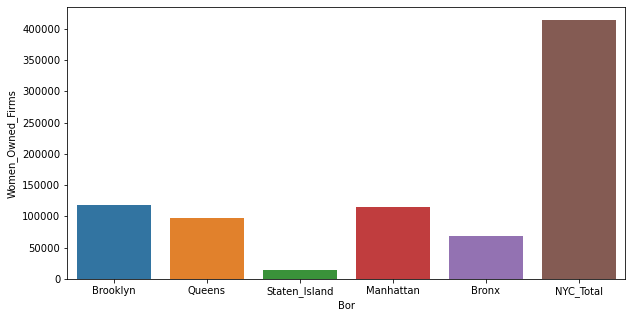

In [66]:
plt.figure(figsize=(10,5))
sns.barplot(x='Bor', y='Women_Owned_Firms', data=wof);

In [67]:
#put values on top of bars

In [73]:
#%women, a sanity check
pct_w = demos.loc["Female persons, percent"]
pct_w = pct_w .str.replace('%', '')
pct_w = pct_w .astype(float)
pct_w = pct_w .reset_index()
pct_w.columns = ['Bor', 'Percentage_Women']

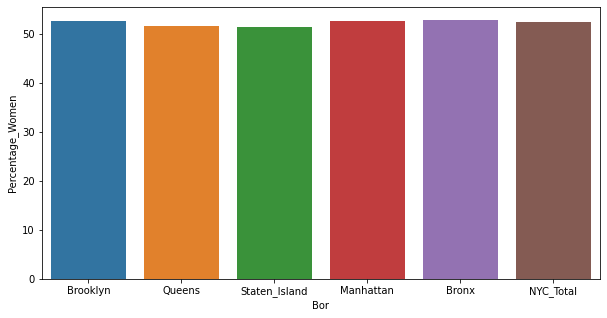

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x='Bor', y='Percentage_Women', data=pct_w);